# K-최근접 이웃 회귀

농어의 길이, 두께, 높이를 기반으로 무게를 예측해보자.

지도 알고리즘은 크게 분류와 회귀(regression)으로 나뉜다. 분류는 이전 2장에서 다루었다. 말 그대로 샘플을 몇개의 클래스 중 하나로 분류하는 문제이다. 회귀는 클래스 중 하나로, 분류하는 것이 아니라 임의의 어떤 숫자를 예측하는 문제이다.

### 여기서 회귀란

간단히->두 변수 사이의 상관관계를 분석하는 방법

### K-최근접 이웃 회귀란

k-최근접 이웃 분류와 마찬가지로 최근접 이웃들을 구한 후, 최근접 이웃들의 타깃 값의 평균을 구한다.

## 데이터 준비

농어의 길이만 사용.
농어의 길이: 특성
농어의 무게: 타깃
(http://bit.ly/perch_data)

In [19]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

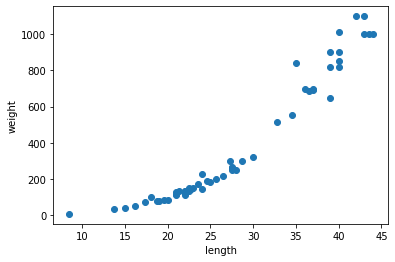

In [20]:
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

그래프만 보더라도 무게와 길이가 관계가 있다는 것을 알 수가 있다.

## 훈련 세트 준비

In [21]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

사이킷런에 사용할 배열들은 2차원 배열이여야 한다. 하지만 perch_length가 1차원 배열이기 때문에 train_input과 test_input 모두 1차원 배열이다.

numpy 배열은 크기를 바꿀 수 있는 reshape()메소드를 지원한다.

In [22]:
test_array = np.array([1, 2, 3, 4])
print(test_array.shape)

(4,)


In [23]:
test_array = test_array.reshape(2, 2)
print(test_array.shape)
# reshape 메소드는 크기가 바뀐 새로운 배열을 반환할 때 지정한 크기가 원본 배열에 있는 원소 갯수와 다르면 에러가 발생한다.

(2, 2)


In [24]:
print(test_array)

[[1 2]
 [3 4]]


In [25]:
# -1은 나머지 원소 갯수로 채우라는 의미이다.
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input, test_input)

[[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]
 [25. ]
 [40. ]
 [39. ]
 [43. ]
 [22. ]
 [20. ]
 [22. ]
 [24. ]
 [27.5]
 [43. ]
 [40. ]
 [24. ]
 [21. ]
 [27.5]
 [40. ]
 [32.8]
 [26.5]
 [36.5]
 [13.7]
 [22.7]
 [15. ]
 [37. ]
 [35. ]
 [28.7]
 [23.5]
 [39. ]
 [21. ]
 [23. ]
 [22. ]
 [44. ]
 [22.5]
 [19. ]
 [37. ]
 [22. ]
 [25.6]
 [42. ]
 [34.5]] [[ 8.4]
 [18. ]
 [27.5]
 [21.3]
 [22.5]
 [40. ]
 [30. ]
 [24.6]
 [39. ]
 [21. ]
 [43.5]
 [16.2]
 [28. ]
 [27.3]]


## 결정계수(R^2)

In [26]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

# k-최근접 이웃 회귀 모델을 훈련한다.
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [27]:
print(knr.score(test_input, test_target))

0.992809406101064


회귀에서 정확한 숫자를 맞힌다는 것은 거의 불가능하다. 예측하는 값과 타깃 모두 임의의 수치이기 때문이다.
회귀에선 결정계수(coeffcient of determination)으로 평가한다. 간단히 R^2라고 부른다.

R^2 = 1 - (타깃 - 예측)^2의 합/(타깃 - 평균)^2의 합

In [28]:
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측을 만든다.
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 절대값 오차를 계산한다.
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


대략 평균 19g정도 오차가 있다는 것을 알 수 있다. 훈련세트와 테스트 세트를 사용하여 평가를 해본다.

## 과대 적합과 과소 적합

In [29]:
knr.score(test_input, test_target)

0.992809406101064

In [30]:
knr.score(train_input, train_target)

0.9698823289099254

일반적으로 train_set의 점수가 높아야 한다. 둘의 차이가 크다면 과대 적합(overfiting)이라 한다. 이는 훈련세트에만 잘 맞는 경우라는 뜻이다. 반대의 경우는 과소 적합(underfiting)의 경우로, 즉 모델이 너무 단순하여 훈련 세트에 적절히 훈련되지 않은 경우이다. 

그렇다면 k-최근접 이웃 회귀 알고리즘에서 모델을 더욱 복잡하게 만드는 방법은 무엇일까. 바로 확인하는 이웃의 갯수를 줄이는 것이다. 이웃의 갯수를 줄이면 훈련세트에 있는 국지적인 패턴에 민감해지고, 이웃의 갯수를 늘리면 데이터 전반에 있는 일반적인 패턴을 따를 것이다.

In [31]:
knr.n_neighbors = 3

knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [32]:
print(knr.score(test_input, test_target))

0.9746459963987609


이렇게 과소적합 문제를 해결하였다.

#### 회귀: 임의의 수치를 예측하는 문제.
#### k-최근접 이웃 회귀: k-최근접 이웃 알고리즘을 사용하여 회귀 문제를 푼다.
#### 결정계수 (R^2) : 대표적인 회귀 문제의 성능측정 도구.
#### 과대적합: 모델 훈련세트 성능이 테스트 세트보다 훨씬 높을 때 일어난다. 모델이 훈련세트에 집착하여 거시적인 패턴을 감지하지 못한다.
#### 과소적합: 테스트 훈련 세트 성능이 모델 훈련세트보다 동일하거나 높을 때 일어난다. 이는 복잡한 모델을 사용해 훈련세트에 잘 맞는 모델을 만들어야 한다.

## 핵심 패키지와 함수

#### KNeighborsRegressor: k-최근접 이웃 회귀 모델을 만드는 사이킷 런 클래스이다.
#### mean_absolute_error(): 회귀 모델의 평균 절댓값 오차를 계산한다. 첫번째 매개변수는 타깃, 두번째는 예측값을 전달한다. 이 함수는 타깃과 예측을 뺀 값을 제곱한다음 전체 샘플에 대해 평균한 값을 반환한다.